In [ ]:
# import necessary python packages 

import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
from datetime import date
import matplotlib.pyplot as plt

# Part 1 Data Acqusition
Read the data from the crawled csv file and display the dataframe general view

In [ ]:
# Read data from a CSV file into a data frame
df = pd.read_csv('zillow.csv')

# Display the first five rows of the data frame to examine if it is an individual-level data set
print(df.head())

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

                                              h_link  ...      lot
0  https://www.zillow.com/homedetails/34-Joyce-Ln...  ...  10890.0
1  https://www.zillow.com/homedetails/61-Cypress-...  ...  11326.0
2  https://www.zillow.com/homedetails/69-Walter-A...  ...  11326.0
3  https://www.zillow.com/homedetails/6-Park-Ct-P...  ...  11326.0
4  https://www.zillow.com/homedetails/6-Lesley-Ln...  ...  11326.0

[5 rows x 19 columns]
['h_link' 'num_of_bed' 'num_of_bath' 'square' 'price' 'zestimate' 'year'
 'month' 'date' 'Unnamed: 9' 'town' 'state' 'zipcode' 'house_type'
 'year_built' 'heating' 'cooling' 'parking' 'lot']
(659, 19)


In [ ]:
#show all the attributes' data types
df.dtypes

h_link          object
num_of_bed     float64
num_of_bath    float64
square         float64
price            int64
zestimate      float64
year             int64
month            int64
date             int64
Unnamed: 9     float64
town            object
state           object
zipcode          int64
house_type      object
year_built     float64
heating         object
cooling         object
parking         object
lot            float64
dtype: object

# Part 2 Data Cleaning
Impute missing / NA values and convert the attribute' data type into properly ones

In [ ]:
#check total counts of missing values of each attribute
df.isnull().sum()

h_link           0
num_of_bed      29
num_of_bath     12
square         267
price            0
zestimate       58
year             0
month            0
date             0
Unnamed: 9     659
town             0
state            0
zipcode          0
house_type       0
year_built       9
heating         15
cooling         41
parking          0
lot             20
dtype: int64

In [ ]:
# Drop the observations that contain missing dependent variable values
# Placeholder variable is DV
DV = 'price'
df1 = df.copy()
df1 = df1.dropna(subset=[DV])
df1.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,Unnamed: 9,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6.0,3.0,3299.0,1080000,1096500.0,2021,10,13,NaN,Woodbury,NY,11797,Single Family Residence,1967.0,Natural Gas,Central Air,2 Attached Garage spaces,10890.0
1,https://www.zillow.com/homedetails/61-Cypress-...,3.0,2.0,NaN,555000,561800.0,2021,10,21,NaN,Bethpage,NY,11714,Single Family Residence,1956.0,Natural Gas,Central Air,1 Attached Garage space,11326.0
2,https://www.zillow.com/homedetails/69-Walter-A...,6.0,4.0,2663.0,875000,NaN,2021,11,15,NaN,Hicksville,NY,11801,Single Family Residence,1981.0,Natural Gas,Wall Unit(s),1 Attached Garage space,11326.0
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5.0,3.0,3662.0,1350000,1360000.0,2021,11,10,NaN,Plainview,NY,11803,Single Family Residence,2021.0,Natural Gas,Central Air,2 Attached Garage spaces,11326.0
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,NaN,1.5,1592.0,560000,641300.0,2021,11,9,NaN,Bethpage,NY,11804,SingleFamily,1957.0,Other,Central,Garage - Attached,11326.0


In [ ]:
df2 = df1.copy()

In [ ]:
#df2['price'] = df2['price'].astype(str).str.replace('$', '').str.replace(',', '')
#df2['price'] = pd.to_numeric(df2['price'], errors='coerce').fillna(df2['price'].median(), inplace=True)
df2['price'] = df2['price'].astype('int64')

In [ ]:
#df2['year_built'] = df2['year_built'].str.replace('Build in ', '')
df2['year_built'] = pd.to_numeric(df2['year_built'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['square'] = df2['square'].str.replace(',', '').str.replace('sqft', '')
df2['square'] = pd.to_numeric(df2['square'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bed'] = df1['num_of_bed'].str.replace('bd', '')
df2['num_of_bed'] = pd.to_numeric(df2['num_of_bed'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bath'] = df1['num_of_bath'].str.replace('ba', '')
df2['num_of_bath'] = pd.to_numeric(df2['num_of_bath'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['lot'] = df1['lot'].str.replace(',', '').str.replace('sqft', '')
df2['lot'] = pd.to_numeric(df2['lot'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['zestimate'] = df2['zestimate'].str.replace('$', '').str.replace(',','')
df2['zestimate'] = pd.to_numeric(df2['zestimate'], errors='coerce').fillna(0).astype(int)

In [ ]:
df2.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,Unnamed: 9,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6,3,3299,1080000,1096500,2021,10,13,NaN,Woodbury,NY,11797,Single Family Residence,1967,Natural Gas,Central Air,2 Attached Garage spaces,10890
1,https://www.zillow.com/homedetails/61-Cypress-...,3,2,0,555000,561800,2021,10,21,NaN,Bethpage,NY,11714,Single Family Residence,1956,Natural Gas,Central Air,1 Attached Garage space,11326
2,https://www.zillow.com/homedetails/69-Walter-A...,6,4,2663,875000,0,2021,11,15,NaN,Hicksville,NY,11801,Single Family Residence,1981,Natural Gas,Wall Unit(s),1 Attached Garage space,11326
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5,3,3662,1350000,1360000,2021,11,10,NaN,Plainview,NY,11803,Single Family Residence,2021,Natural Gas,Central Air,2 Attached Garage spaces,11326
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,0,1,1592,560000,641300,2021,11,9,NaN,Bethpage,NY,11804,SingleFamily,1957,Other,Central,Garage - Attached,11326


In [ ]:
df2.dtypes

h_link          object
num_of_bed       int64
num_of_bath      int64
square           int64
price            int64
zestimate        int64
year             int64
month            int64
date             int64
Unnamed: 9     float64
town            object
state           object
zipcode          int64
house_type      object
year_built       int64
heating         object
cooling         object
parking         object
lot              int64
dtype: object

In [ ]:
#seperate numerical variable and categorical variable
nvar_list = ['num_of_bed', 'num_of_bath', 'square',  'price', 'zestimate', 'year_built', 'lot' ]
#cvar_list = ['h_link', 'sold_type', 'month', 'date','year', 'address', 'town', 'state', 'zipcode',  'house_type', 'heating', 'cooling',  'parking' ]


# Part 3 Data Exploration
Explore the relationships among independent varialbes and dependent variable

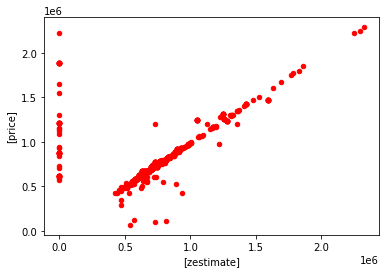

In [ ]:
 # Placeholder variables: x_var, y_var. 
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = [ 'zestimate']
y_var = [ 'price']

# Draw the scatterplot
df2.plot.scatter(x=x_var, y=y_var, color = ['red'], legend=False)

In [ ]:
df3 = df2.copy()
df3 = df3[nvar_list]

             num_of_bed  num_of_bath    square  ...  zestimate  year_built       lot
num_of_bed     1.000000     0.649503  0.367229  ...   0.300562    0.364596  0.278794
num_of_bath    0.649503     1.000000  0.456109  ...   0.415384    0.332559  0.406063
square         0.367229     0.456109  1.000000  ...   0.382397    0.158995  0.415581
price          0.461923     0.598618  0.567370  ...   0.455897   -0.120319  0.623178
zestimate      0.300562     0.415384  0.382397  ...   1.000000    0.108764  0.331558
year_built     0.364596     0.332559  0.158995  ...   0.108764    1.000000 -0.066472
lot            0.278794     0.406063  0.415581  ...   0.331558   -0.066472  1.000000

[7 rows x 7 columns]


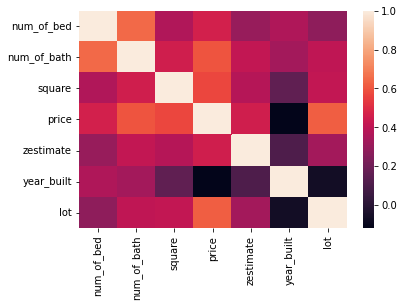

In [ ]:
# Draw a heat map for all the numerical variables in the data frame

# Placeholder variables: df4heatmaps
df4heatmaps = df3

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Part 4 Association Transformation

In [ ]:
# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 

#drop variables 
drop_list = ['h_link', 'zipcode',  'month', 'date','year', 'state']
df4 = df2.copy()
df4 = df4.drop(columns = drop_list)

In [ ]:
import numpy as np
df5 = df4.copy()

In [ ]:
cvar_list = [ 'house_type', 'town', 'heating', 'cooling',  'parking']
df5 = df4[cvar_list].copy()


In [ ]:
#define conditions
conditions = [df4['price'] > df4['zestimate'], 
              df4['price'] < df4['zestimate']]

#define choices
choices = ['1', '0']

#create new column in DataFrame that displays results of comparisons
df5['class'] = np.select(conditions, choices, default='0')
df5['class'] = df5['class'].astype('category')

In [ ]:
# Convert the categorical variables into dummies 
# prefix_sep is the sympol used to create the dummy variable names.
df6 = df5.copy()
df6 = pd.get_dummies(df6, prefix_sep='_')

In [ ]:
df6 = df6.astype('category')


In [ ]:
df6.dtypes

house_type_Multi Family               category
house_type_MultiFamily                category
house_type_Single Family Residence    category
house_type_SingleFamily               category
house_type_Townhouse                  category
house_type_Unknown                    category
town_Bethpage                         category
town_Hicksville                       category
town_Huntington                       category
town_Jericho                          category
town_Melville                         category
town_Plainview                        category
town_Syosset                          category
town_Woodbury                         category
heating_Baseboard                     category
heating_Electric                      category
heating_Forced air                    category
heating_Hot Water                     category
heating_Natural Gas                   category
heating_Oil                           category
heating_Other                         category
heating_Propa

In [ ]:
df7 = df6.copy()

In [ ]:
# Get the remaining variable list after the variable transformation
print(df7.columns.values)

['house_type_Multi Family' 'house_type_MultiFamily'
 'house_type_Single Family Residence' 'house_type_SingleFamily'
 'house_type_Townhouse' 'house_type_Unknown' 'town_Bethpage'
 'town_Hicksville' 'town_Huntington' 'town_Jericho' 'town_Melville'
 'town_Plainview' 'town_Syosset' 'town_Woodbury' 'heating_Baseboard'
 'heating_Electric' 'heating_Forced air' 'heating_Hot Water'
 'heating_Natural Gas' 'heating_Oil' 'heating_Other' 'heating_Propane'
 'cooling_Central' 'cooling_Central Air' 'cooling_Ductless' 'cooling_None'
 'cooling_Other' 'cooling_Wall' 'cooling_Wall Unit(s)'
 'cooling_Window Unit(s)' 'cooling_Zoned' 'parking_0 spaces'
 'parking_1 Attached Garage space' 'parking_1 Garage space'
 'parking_1 Parking space' 'parking_2 Attached Garage spaces'
 'parking_2 Garage spaces' 'parking_2 Parking spaces'
 'parking_3 Attached Garage spaces' 'parking_3 Garage spaces'
 'parking_3 Parking spaces' 'parking_4 Attached Garage spaces'
 'parking_4 Garage spaces' 'parking_4 Parking spaces'
 'parkin

In [ ]:
# Remove the redundant dummies 
# Placeholder variable: rdummies
rdummies = [ 'house_type_Multi Family', 'town_Bethpage', 'heating_Baseboard', 'cooling_Central', 'parking_0 spaces', 'class_1']
df8 = df7.copy()
df8 = df7.drop(columns=rdummies)

# Part 5 Data Partition
Split the dataset into training part and testing part

In [ ]:
# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df8
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

    house_type_MultiFamily  ... class_0
382                      0  ...       1
441                      0  ...       1
421                      0  ...       1
363                      0  ...       1
536                      0  ...       1
..                     ...  ...     ...
144                      0  ...       0
645                      0  ...       0
72                       0  ...       0
235                      0  ...       1
37                       0  ...       0

[527 rows x 48 columns]


# Part 6 - 2 Classification Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dv = 'class_0'
y = df_nontestData[dv]
X = df_nontestData.drop(columns=[dv])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

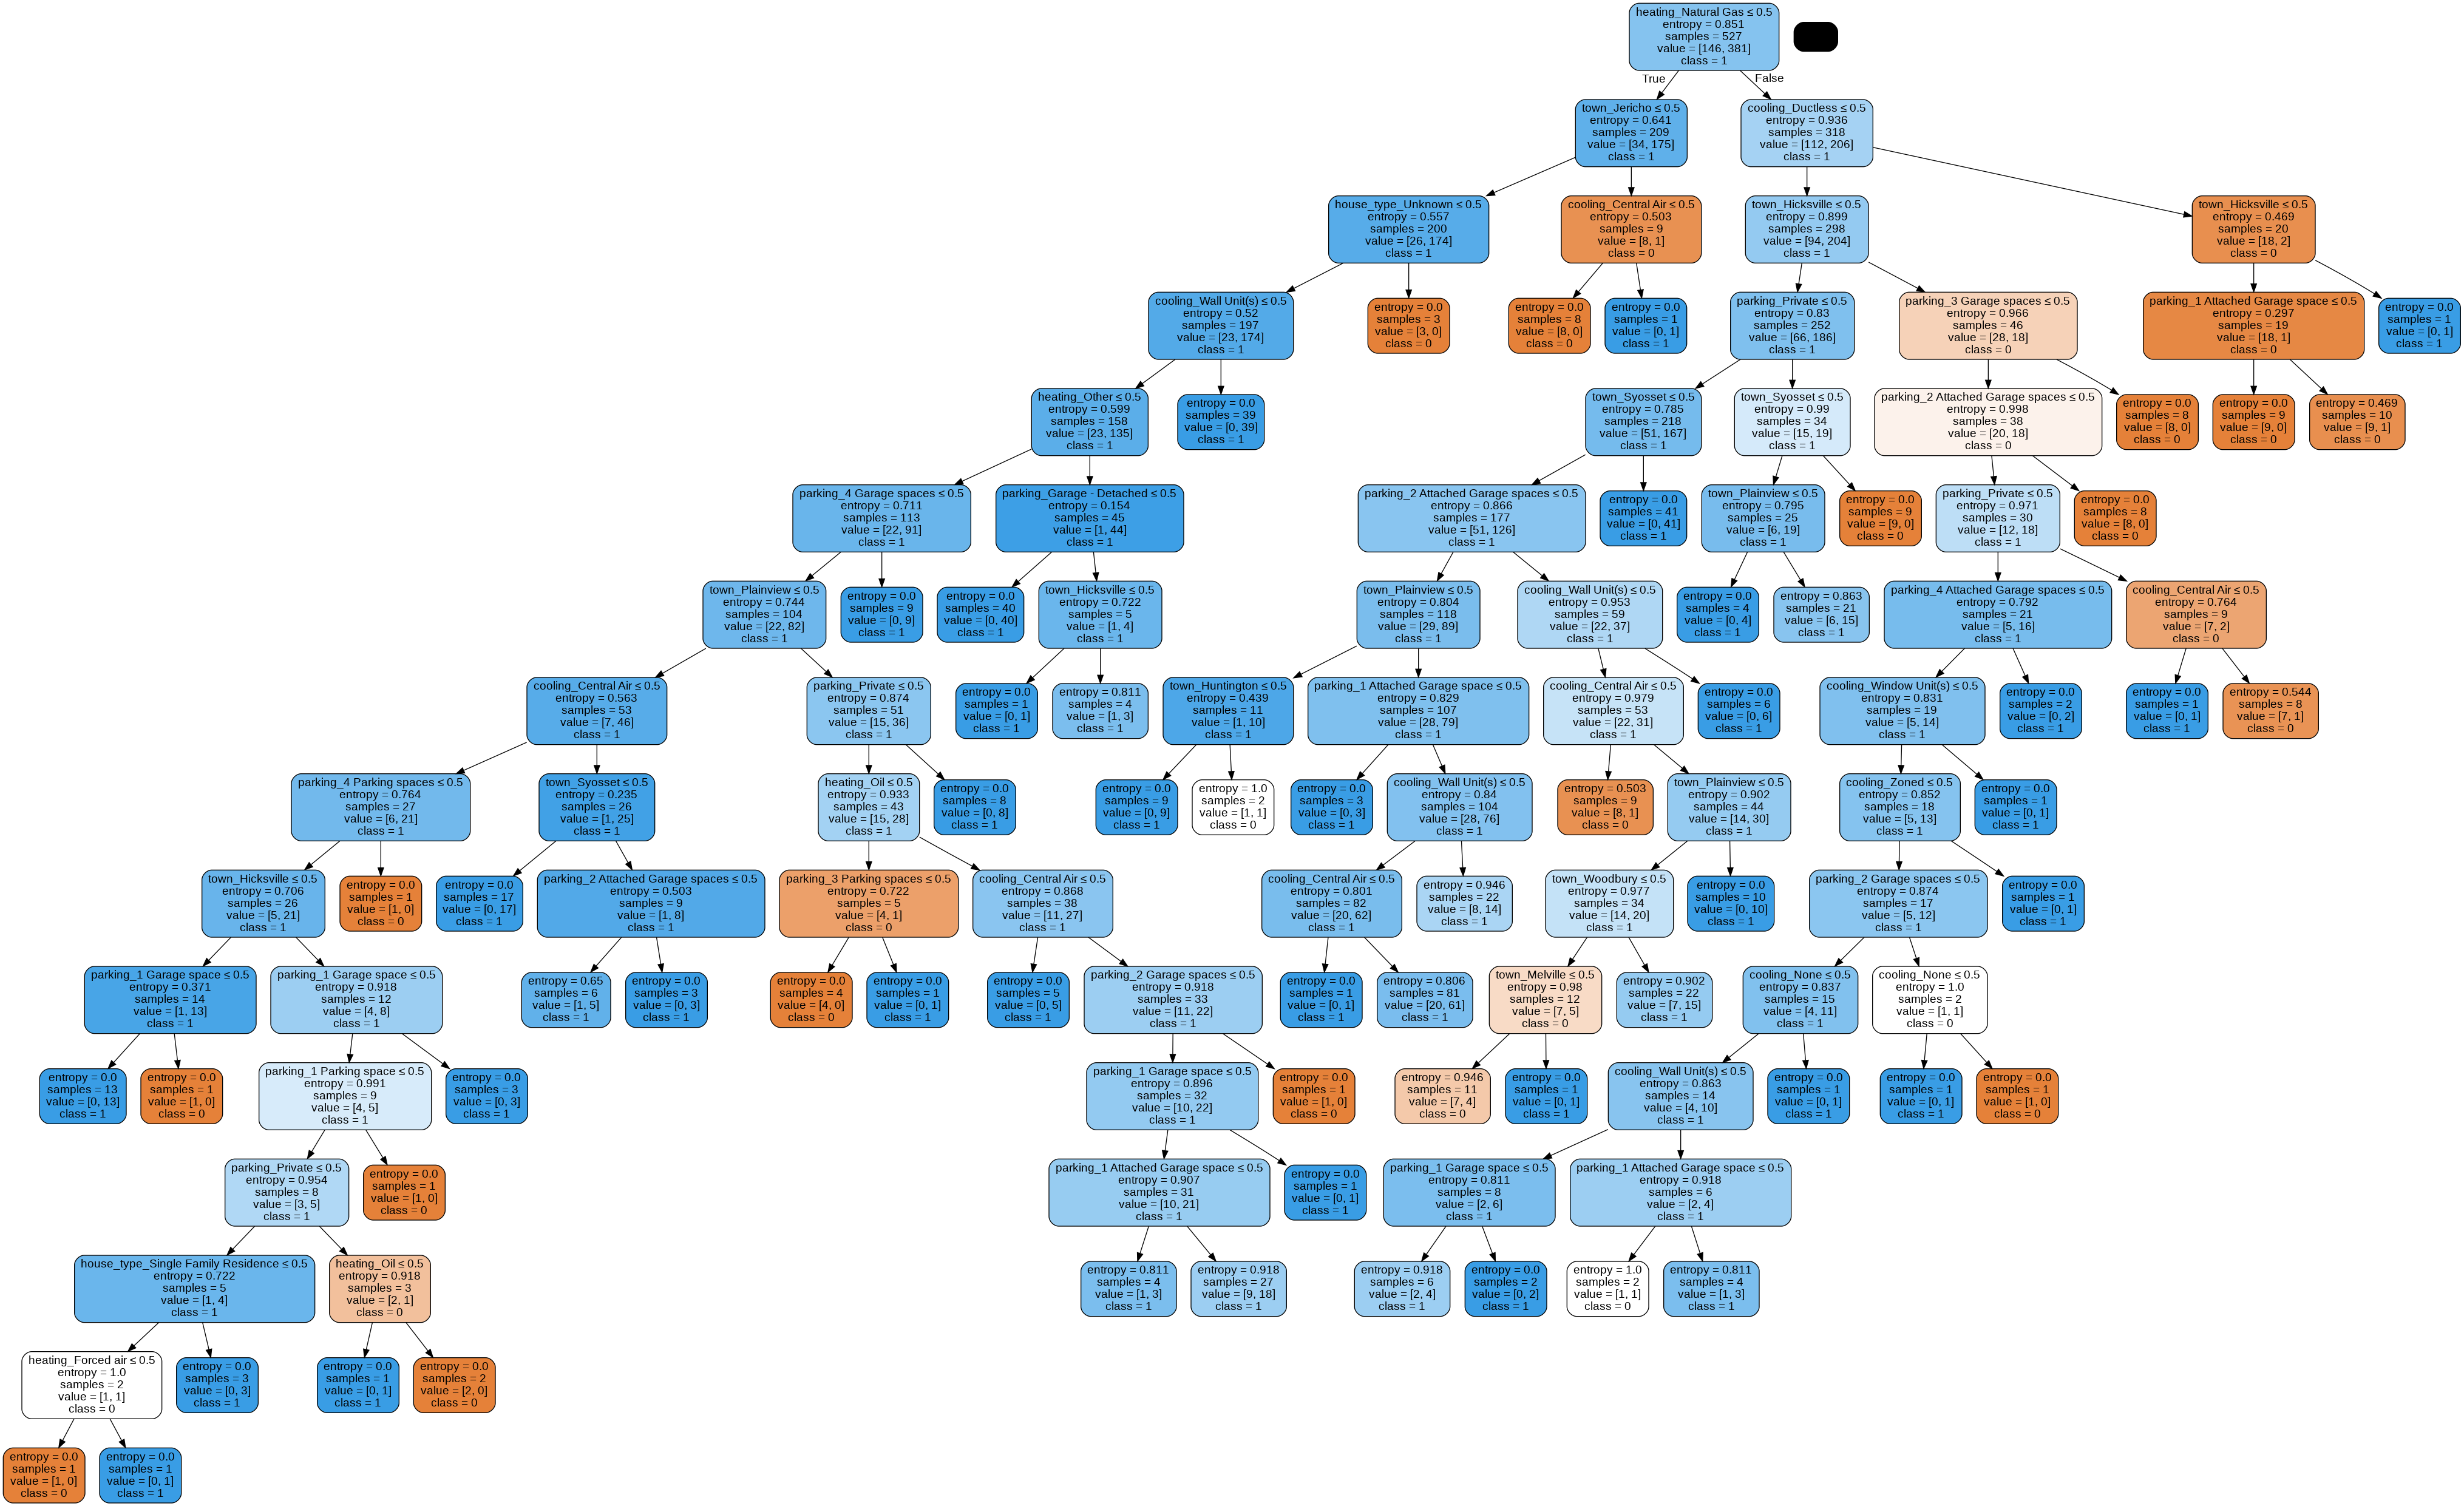

In [ ]:
kfolds = 5

maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

Image(summary_tree(clf_BPT))

In [ ]:
print(clf_BPT.get_depth())

y_test_actual = df_testData[dv]

X_test = df_testData.drop(columns=[dv])


from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

15
0.92640625


In [ ]:
import numpy as np

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    for (ind,nod) in enumerate(leaves):

        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['heating_Natural Gas <= 0.5', 'town_Jericho <= 0.5', 'house_type_Unknown <= 0.5', 'cooling_Wall Unit(s) <= 0.5', 'heating_Other <= 0.5', 'parking_4 Garage spaces <= 0.5', 'town_Plainview <= 0.5', 'cooling_Central Air <= 0.5', 'parking_4 Parking spaces <= 0.5', 'town_Hicksville <= 0.5', 'parking_1 Garage space <= 0.5']
sample = 13
value = [0, 13]
class =  1

Leaf node ID = 2
Path = ['heating_Natural Gas <= 0.5', 'town_Jericho <= 0.5', 'house_type_Unknown <= 0.5', 'cooling_Wall Unit(s) <= 0.5', 'heating_Other <= 0.5', 'parking_4 Garage spaces <= 0.5', 'town_Plainview <= 0.5', 'cooling_Central Air <= 0.5', 'parking_4 Parking spaces <= 0.5', 'town_Hicksville <= 0.5', 'parking_1 Garage space > 0.5']
sample = 1
value = [1, 0]
class =  0

Leaf node ID = 3
Path = ['heating_Natural Gas <= 0.5', 'town_Jericho <= 0.5', 'house_type_Unknown <= 0.5', 'cooling_Wall Unit(s) <= 0.5', 'heating_Other <= 0.5', 'parking_4 Garage spaces <= 0.5', 'town_Plainview <= 0.5', 'cooling_Ce